<a href="https://colab.research.google.com/github/sjino/Lecture/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%9C%EB%A1%A0/Classifier_Linear_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

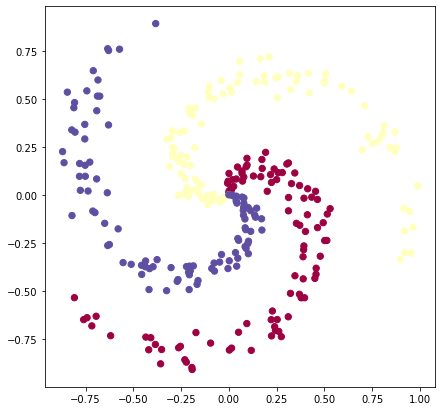

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N * K, D))  # data matirx (each row = single example)
y = np.zeros(N * K, dtype='uint8')  # class labels
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
# visualizing the data
plt.rcParams['figure.figsize'] = [7, 7]
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.get_cmap("Spectral"))
plt.show()


iteration 0: loss 1.101683
iteration 10: loss 0.905287
iteration 20: loss 0.832243
iteration 30: loss 0.798943
iteration 40: loss 0.781484
iteration 50: loss 0.771443
iteration 60: loss 0.765287
iteration 70: loss 0.761334
iteration 80: loss 0.758707
iteration 90: loss 0.756913
iteration 100: loss 0.755662
iteration 110: loss 0.754774
iteration 120: loss 0.754136
iteration 130: loss 0.753671
iteration 140: loss 0.753330
iteration 150: loss 0.753078
iteration 160: loss 0.752890
iteration 170: loss 0.752749
iteration 180: loss 0.752642
iteration 190: loss 0.752562
training accuracy: 0.53


(-1.8634899430085512, 1.776510056991452)

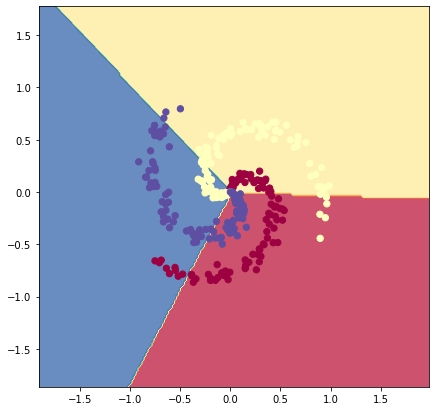

In [ ]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3  # regularizaion strength

num_examples = X.shape[0]
for i in range(200):
    # compute class scores for a linear classifier
    scores = np.dot(X, W) + b

    # get unnormalized probabilities
    exp_scores = np.exp(scores)
    # normalize them for each example
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(num_examples), y])

    # compute the loss: average cross-entropy loss and regulazation
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))

    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    dW += reg * W  # don't forget the regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_=np.arange(x_min, x_max, h)
y_=np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x_,y_)

space = np.c_[xx.ravel(), yy.ravel()]
Z = np.dot(space, W)+b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
#fig = plt.figure()
plt.rcParams['figure.figsize'] = [7, 7]
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8,)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

iteration 0: loss 1.098682
iteration 1000: loss 0.295317
iteration 2000: loss 0.249452
iteration 3000: loss 0.243407
iteration 4000: loss 0.239584
iteration 5000: loss 0.238061
iteration 6000: loss 0.237729
iteration 7000: loss 0.237519
iteration 8000: loss 0.237304
iteration 9000: loss 0.237224
training accuracy: 0.99


(-1.8634899430085512, 1.776510056991452)

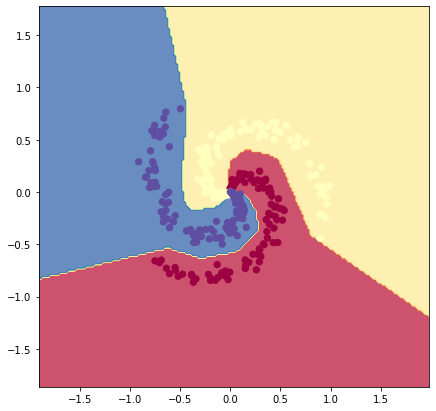

In [ ]:
# initialize parameters randomly
h = 100  # size of hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3  # regularizaion strength

# gradient descent loop
num_examples = X.shape[0]

for i in range(10000):

    # evaluate class scores [NxK]
    hidden_layer = np.maximum(0, np.dot(X, W) + b)  # ReLU activation func
    scores = np.dot(hidden_layer, W2) + b2

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [NxK]

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # backpropagate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print("training accuracy: %.2f" % (np.mean(predicted_class == y)))




h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_=np.arange(x_min, x_max, h)
y_=np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x_,y_)

space = np.c_[xx.ravel(), yy.ravel()]
Z = np.dot(np.maximum(0, np.dot(space, W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.rcParams['figure.figsize'] = [7, 7]
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
